ToDo:
- Binary classification
- Multiclass classification

In [64]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [65]:
breast_cancer_orginal = load_breast_cancer()
breast_cancer_orginal.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [66]:
pd.DataFrame(breast_cancer_orginal.data)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [67]:
breast_cancer_orginal.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [68]:
X = breast_cancer_orginal.data
y = breast_cancer_orginal.target

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [71]:
y_pred = knn.predict(X_test)

## Making Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[38,  4],
       [ 2, 70]])

In [73]:
type(confusionMatrix)

numpy.ndarray

## Analysing Confusion Matrix

In [74]:
TN = confusionMatrix[0][0]
TP = confusionMatrix[1][1]
FN = confusionMatrix[1][0]
FP = confusionMatrix[0][1]
print(TN, TP, FN, FP)

38 70 2 4


In [75]:
precision = TP / (TP + FP)
print("precision:", precision)

precision: 0.9459459459459459


In [76]:
recall = TP / (TP + FN)
print("recall:", recall)

recall: 0.9722222222222222


In [77]:
specificity = FP / (FP + TN)
print("specificity", specificity)

specificity 0.09523809523809523


In [78]:
falsePositiveRate = FP / (FP + TN)
print("False Positive Rate", falsePositiveRate)

False Positive Rate 0.09523809523809523


In [79]:
falseNegativeRate = FN / (FN + TP)
print("False Negative Rate", falseNegativeRate)

False Negative Rate 0.027777777777777776


In [80]:
F1_score = 2 * (precision * recall) / (precision + recall)
print("F1-Score", F1_score)

F1-Score 0.9589041095890412


In [81]:
y_pred_class = knn.predict_proba(X_test)

In [82]:
from sklearn.preprocessing import binarize
binarize(y_pred_class, 0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [83]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

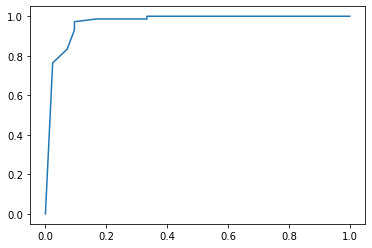

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class[:, 1])
plt.plot(fpr, tpr)

In [90]:
from sklearn.metrics import roc_auc_score

In [92]:
roc_auc_score(y_test, y_pred_class[:, 1])

0.9690806878306879